In [26]:
import os
import matplotlib.pyplot as plt
%matplotlib inline  
from PIL import Image
from shutil import copyfile
import numpy as np 
#import cv2
dir_path = os.getcwd()+'/img/'
people=['Vishal Singh','Vijaya Shekhar','Debolina Banerjee','Shailaja Tirkey','Bidisha Mahato','Mimansha Jyoti','Harshit Oswin','Rishabh Maharshee','Mobashshir Jawaid','Sarvagya Mehrotra','Abhishek Ghosh','Ankit Kr. Choudhary']
def readFiles(path):
    global maxWidth,maxHeight
    maxWidth=0
    maxHeight=0
    for file in os.listdir(path):
        if file.endswith('.JPG'):
            im=Image.open(path+file)
            if im.size[0]>maxWidth :
                maxWidth=im.size[0]
            if im.size[1]>maxHeight :
                maxHeight=im.size[1]
    return
def processFiles(path):
    newpath= os.getcwd()+'/imgproc/'
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    for file in os.listdir(path):
        im=Image.new('RGB',(maxWidth,maxHeight),'black')
        newname = file.split('.')
        if file.endswith('.JPG'):
            newIM = Image.open(path+file)
            offset = ((maxWidth - newIM.size[0]) / 2, (maxHeight - newIM.size[1]) / 2)
            im.paste(newIM,offset)
            im.rotate(-90).save(newpath+newname[0]+'proc.JPG')
    return
def resizeImage(path):
    for file in os.listdir(path):
        newname = file.split('.')
        if file.endswith('.JPG'):
            newIM = Image.open(path+file)
            im = newIM.resize((128,128))
            im.save(path+newname[0]+'.JPG')
    return
def toGrayscale(path):
    for file in os.listdir(path):
        if file.endswith('.JPG'):
            img= Image.open(path+file).convert('L')
            img.save(path+file)
    return
def trainandtest(path):
    traindat= os.getcwd()+'/imgtrain/'
    testdat= os.getcwd()+'/imgtest/'
    if not os.path.exists(traindat):
        os.makedirs(traindat)
    if not os.path.exists(testdat):
        os.makedirs(testdat)
    i=1
    for file in os.listdir(path):
        if file.endswith('.JPG'):
            if i<8:
                copyfile(path+file,traindat+file)
            else:
                copyfile(path+file,testdat+file)
            if i==10:
                i=1
            else:
                i=i+1
    return
def getPixel(path):
    result_arr = np.empty((16384,0))
    count=0
    for file in os.listdir(path):
            if file.endswith('.JPG'):
                img = Image.open(path+file)
                arr=np.array(img.getdata())
                flat_arr=arr.ravel()
                flat_arr= np.reshape(flat_arr,(flat_arr.size,1))
                result_arr=np.append(result_arr,flat_arr,axis=1)
                #print result_arr.shape
                count+=1
    result_arr = np.append(result_arr,np.ones((1,count)),axis=0)
    return result_arr
def getTarget():
    target=np.zeros((84,12))
    pos=0
    for i in range(84):
        target[i][pos]=1
        j=i+1
        if j%7 == 0:
            pos+=1
    return target
def getTestTarget():
    target=np.zeros((36,12))
    pos=0
    for i in range(36):
        target[i][pos]=1
        j=i+1
        if j%3 == 0:
            pos+=1
    return target
def processFilestest(path):
    newpath= path+'/imgproc/'
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    for file in os.listdir(path):
        im=Image.new('RGB',(maxWidth,maxHeight),'black')
        newname = file.split('.')
        if file.endswith('.JPG'):
            newIM = Image.open(path+file)
            offset = ((maxWidth - newIM.size[0]) / 2, (maxHeight - newIM.size[1]) / 2)
            im.paste(newIM,offset)
            im.save(newpath+newname[0]+'proc.JPG')
    return

In [2]:
readFiles(dir_path)
processFiles(dir_path)
resizeImage(os.getcwd()+'/imgproc/')
toGrayscale(os.getcwd()+'/imgproc/')

NameError: name 'readFiles' is not defined

In [3]:
readFiles(dir_path)

In [4]:
trainandtest(os.getcwd()+'/imgproc/')

In [ ]:
def feedForward():
    input_arr=getPixel(os.getcwd()+'/imgtrain/')
    input_arr=input_arr/255 #normalise
    print input_arr[147]
    alpha=0.000001
    weight = np.zeros((16385,12))
    target=getTarget()
    error=1.1
    i=0
    while(error>0.1):
        y=np.dot(np.transpose(input_arr),weight)
        difference = target-y
        dele=np.sum(difference)
        error=np.sum(np.square(difference))/2
        plt.plot(i,error,'r*')
        i+=1
        #print i
        weight=weight+alpha*np.dot(input_arr,difference)
    print 'Iterations : ',i
    return weight

def testFeedForward(weight):
    input_arr=getPixel(os.getcwd()+'/imgtest/')
    input_arr=input_arr/255 #normalise
    y=np.dot(np.transpose(input_arr),weight)
    for i in range(input_arr.shape[1]):
        k=y[i]
        print 'Person is : '+people[np.where(k==np.max(k))[0][0]]
    return


In [ ]:
def realtimetesting(weight):
    home = os.getcwd()
    i=0
    for file in os.listdir(home+'/imgtest/'):
        i=i+1
    cap = cv2.VideoCapture(0)
    while(True):
        ret, frame = cap.read()
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2BGRA)

        cv2.imshow('frame', rgb)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            out = cv2.imwrite(home+'/imgtest/capture'+str(i)+'.JPG', frame)
            break

    cap.release()
    cv2.destroyAllWindows()
    newpath=home+'/imgtest/'
    processFilestest(newpath)
    resizeImage(newpath+'/imgproc/')
    toGrayscale(newpath+'/imgproc/')
    input_arr=getPixel(newpath+'/imgproc/')
    input_arr=input_arr/255 #normalise
    y=np.dot(np.transpose(input_arr),weight)
    print y
    print input_arr.shape
    for i in range(input_arr.shape[1]):
        k=y[i]
        print 'Person is : '+people[np.where(k==np.max(k))[0][0]]
    return

[0.         0.         0.         0.         0.         0.
 0.         0.95294118 0.94901961 0.94117647 0.94117647 0.94901961
 0.9372549  0.9372549  0.95294118 0.92156863 0.95686275 0.95294118
 0.94117647 0.96078431 0.97254902 0.96862745 0.98039216 0.97254902
 0.98039216 0.96862745 0.98039216 0.97647059 0.98823529 0.98823529
 0.98823529 0.98823529 0.94509804 0.98431373 0.85098039 0.98431373
 0.98431373 0.98039216 0.98039216 0.98431373 0.98431373 0.98431373
 0.89803922 0.78823529 0.77647059 0.8        0.75686275 0.77254902
 0.81960784 0.89803922 0.98823529 0.50196078 0.98039216 0.94509804
 0.97647059 0.98431373 0.83529412 0.81960784 0.80784314 0.60784314
 0.35294118 0.34117647 0.4        0.68235294 0.30980392 0.27843137
 0.29411765 0.28235294 0.25882353 0.31372549 0.74509804 0.89019608
 0.88235294 0.89019608 0.87843137 0.88627451 0.89411765 0.05882353
 0.07843137 0.1372549  0.08235294 0.09019608 0.07843137 0.0745098 ]
Iterations :  7569


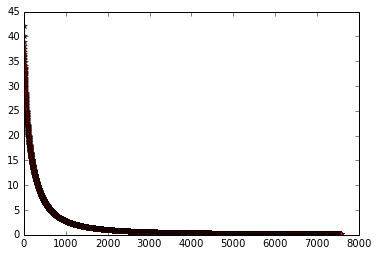

In [18]:
weight=feedForward()

In [13]:
realtimetesting(weight)

[[ 0.39629044  0.20620239 -0.13159909 -0.21995069 -0.23332992  0.07051564
   0.03166949  0.21118973 -0.01484574  0.10204825  0.12789405  0.00583098]]
(16385, 1)
Person is : Vishal Singh


In [21]:
testFeedForward(weight)

NameError: name 'testFeedForward' is not defined

In [24]:
import random
def backprop():
    input_arr=getPixel(os.getcwd()+'/imgtrain/')
    input_arr=input_arr/255 #normalise
    #print input_arr.shape
    #print input_arr[147]
    alpha=0.000001
    #initialising weights
    weight1 = np.random.uniform(low=-1, high=1, size=(16385,16385) )
    weight2 = np.random.uniform(low=-1, high=1, size=(16385,12) )

    i=0
    error = 1000
    while ((error>0.1) and (i<1500)):
        #forward Pass
        hiddenLayerInput = np.dot(np.transpose(input_arr),weight1)
        hiddenLayerOutput = 1/(1+np.exp(-hiddenLayerInput))
        outputLayerInput = np.dot(hiddenLayerOutput,weight2)
        FinalOutput = 1/(1+np.exp(-outputLayerInput))
        #print hiddenLayerInput.shape
        #print outputLayerInput.shape

        #error calculation
        target=getTarget()
        difference= target - FinalOutput
        error=np.sum(np.square(difference))/2
        print error,i
        plt.plot(i,error,'r*')

        #weight updation output layer
        delta = difference*FinalOutput*(1-FinalOutput)
        #print weight2.shape , hiddenLayerOutput.shape ,delta.shape
        weight2 += (alpha*np.dot(np.transpose(hiddenLayerOutput),delta))

        #weight updation hidden layers
        temp = hiddenLayerOutput*(1-hiddenLayerOutput)
        #print temp.shape
        temp2 = np.dot(weight2,np.transpose(delta))
        #print hiddenLayerOutput.shape, weight2.shape, temp2.shape
        temp3 = temp2.sum(axis=1)
        #print temp3.shape
        #print temp.shape ,temp3.shape, weight2.shape, weight1.shape, input_arr.shape
        weight1 += alpha*temp3*np.dot(input_arr,temp)
        i+=1
    print "Number of iterations : " , i  
    return(weight1, weight2)
    

126.0 0
122.277381083 1
118.716255681 2
115.313385219 3
112.064913039 4
108.966478876 5
106.013325506 6
103.200396286 7
100.522422876 8
97.9740028599 9
95.5496673442 10
93.2439389179 11
91.0513805228 12
88.9666359427 13
86.9844626856 14
85.099758069 15
83.3075793172 16
81.6031584493 17
79.9819126955 18
78.4394511189 19
76.9715780591 20
75.5742939502 21
74.2437939984 22
72.9764651449 23
71.7688816803 24
70.6177998263 25
69.5201515472 26
68.4730378174 27
67.4737215275 28
66.5196201827 29
65.6082985165 30
64.7374611192 31
63.9049451595 32
63.1087132611 33
62.3468465796 34
61.6175381146 35
60.919086281 36
60.2498887559 37
59.6084366091 38
58.9933087232 39
58.403166501 40
57.8367488576 41
57.2928674908 42
56.7704024222 43
56.2682977985 44
55.7855579434 45
55.3212436487 46
54.8744686929 47
54.4443965764 48
54.0302374612 49
53.6312453038 50
53.2467151698 51
52.8759807211 52
52.518411863 53
52.173412543 54
51.8404186911 55
51.5188962926 56
51.2083395857 57
50.9082693744 58
50.6182314503 59
50.

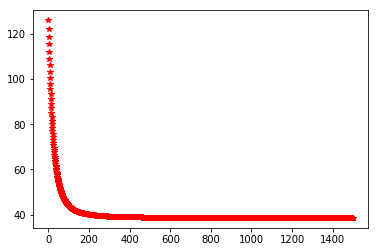

In [16]:
(weight1,weight2) = backprop() #weights initialised to 0


In [ ]:
def testBackProp(weight1, weight2):
    input_arr=getPixel(os.getcwd()+'/imgtrain/')
    input_arr=input_arr/255 #normalise
   
    
    hiddenLayerInput = np.dot(np.transpose(input_arr),weight1)
    hiddenLayerOutput = 1/(1+np.exp(-hiddenLayerInput))
    outputLayerInput = np.dot(hiddenLayerOutput,weight2)
    FinalOutput = 1/(1+np.exp(-outputLayerInput))
    test_target = getTestTarget()
    target = getTarget()
    
    print FinalOutput
    
    y_test_class = np.argmax(test_target,axis=1)
    y_pred_class = np.argmax(FinalOutput,axis=1)
      
    success =0.0;failure =0.0; result=0.0
    for i in range(0,test_target.shape[0]):
        #print y_pred_class[i], y_test_class[i]
        if(y_pred_class[i]==y_test_class[i]):
            success+=1
        else:
            failure+=1
    result = success / test_target[0]
    
    print result


In [ ]:
testBackProp(weight1, weight2)

299.985841386 0
299.612674187 1
299.257986687 2
298.923493757 3
298.609221023 4
298.313799687 5
298.03495851 6
297.769998779 7
297.516150441 8
297.270793788 9
297.03156858 10
296.796403871 11
296.563502509 12
296.331308714 13
296.098476713 14
295.863845009 15
295.626406441 16
295.385251776 17
295.139458 18
294.887896242 19
294.628950943 20
294.360168568 21
294.077885294 22
293.776919993 23
293.450480965 24
293.09054648 25
292.689116 26
292.24072169 27
291.746029747 28
291.214871021 29
290.665872413 30
290.122328883 31
289.607631087 32
289.14076623 33
288.730671621 34
288.374251178 35
288.061171774 36
287.780165122 37
287.522165496 38
287.280622155 39
287.050761526 40
286.828827887 41
286.611643232 42
286.396521997 43
286.181455241 44
285.965413042 45
285.748563589 46
285.532202556 47
285.318294632 48
285.108751978 49
284.904767213 50
284.706507588 51
284.513267903 52
284.323949296 53
284.137619346 54
283.953919625 55
283.773169131 56
283.596139716 57
283.42362189 58
283.255981407 59
28

KeyboardInterrupt: 

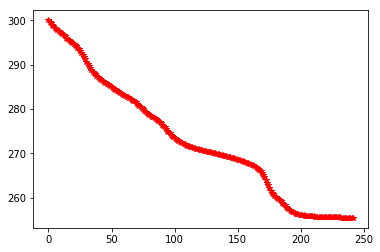

In [25]:
(weight1,weight2) = backprop()#weights initialsed to random numbers between -1 and 1

In [ ]:
testBackProp(weight1, weight2)

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
def preproc():
    train_arr=getPixel(os.getcwd()+'/imgtrain/')
    train_arr=train_arr/255
    
    test_arr=getPixel(os.getcwd()+'/imgtest/')
    test_arr=test_arr/255
    
    train_target=getTarget()
    test_target=getTestTarget()

    return (train_arr,train_target,test_arr,test_target)



In [60]:
model = Sequential()

model.add(Dense(13108, activation='relu', input_dim=16385)) 
model.add(Dense(10486,activation='relu'))
model.add(Dense(8389,activation='relu'))
model.add(Dense(12, activation='softmax')) 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 13108)             214787688 
_________________________________________________________________
dense_6 (Dense)              (None, 10486)             137460974 
_________________________________________________________________
dense_7 (Dense)              (None, 8389)              87975443  
_________________________________________________________________
dense_8 (Dense)              (None, 12)                100680    
Total params: 440,324,785
Trainable params: 440,324,785
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(train_arr,train_target,test_arr,test_target) = preproc();
model.fit(np.transpose(train_arr),train_target,epochs=5)

Epoch 1/200
84/84 [==============================] - 926s 11s/step - loss: 10.3509 - acc: 0.0595
Epoch 2/200
84/84 [==============================] - 816s 10s/step - loss: 14.7749 - acc: 0.0833
Epoch 3/200
84/84 [==============================] - 775s 9s/step - loss: 14.7749 - acc: 0.0833
Epoch 4/200
84/84 [==============================] - 805s 10s/step - loss: 14.7749 - acc: 0.0833
Epoch 5/200
84/84 [==============================] - 687s 8s/step - loss: 14.7749 - acc: 0.0833
Epoch 6/200
84/84 [==============================] - 739s 9s/step - loss: 14.7749 - acc: 0.0833
Epoch 7/200
84/84 [==============================] - 678s 8s/step - loss: 14.7749 - acc: 0.0833
Epoch 8/200
84/84 [==============================] - 836s 10s/step - loss: 14.7749 - acc: 0.0833
Epoch 9/200
84/84 [==============================] - 786s 9s/step - loss: 14.7749 - acc: 0.0833
Epoch 10/200
84/84 [==============================] - 723s 9s/step - loss: 14.7749 - acc: 0.0833
Epoch 11/200
84/84 [===============

In [ ]:
y_pred = model.predict(test_arr)

y_test_class = np.argmax(test_target,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [ ]:
def accuracy():
    success =0.0;failure =0.0; result=0.0
    for i in range(0,test_target.shape[0]):
        #print y_pred_class[i], y_test_class[i]
        if(y_pred_class[i]==y_test_class[i]):
            success+=1
        else:
            failure+=1
    result = success / y_test.shape[0]
    return (result*100)
result = accuracy()
print result